A very basic neural network to classify images into cats and dogs. The data used is the cats-vs-dogs dataset from Kaggle. 
You can find it here: https://www.kaggle.com/c/dogs-vs-cats/data

The implementation is inspired from pytorch example code and pytorch 60-min blitz tutorial available at https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [2]:
import pandas as pd
import torch
#Import Torch Neural Network module
import torch.nn as nn
# Torchvision is the torch module for image processing
import torchvision
import torchvision.transforms as transforms

In [9]:
# This section 
from os import listdir
from os.path import isfile, join

image_path = "/Users/balakumaranpanneerselvam/Documents/Bala/projects/torch/data/dogs_vs_cats/train/"
onlyfiles = [f for f in listdir(image_path) if isfile(join(image_path, f))]

classified = []
for i in range(len(onlyfiles)):
    classified.append(onlyfiles[i].split('.',1)[0])
    
classes = ('cat', 'dog')

In [82]:
# The load_dataset function handles loading the training dataset from disk. 
# The structure of the data stored should be the following
# root/dog/xxx.png
# root/dog/xxy.png
# root/dog/xxz.png
# root/cat/123.png
# root/cat/nsdf3.png
# root/cat/asd932_.png

def load_dataset():
    transform = transforms.Compose(
                   [transforms.Resize((32,32)),
                    transforms.ToTensor()])
#                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
    data_path = "/Users/balakumaranpanneerselvam/Documents/Bala/projects/torch/data/dogs_vs_cats/train"
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        # You can read about tensors here: 
        # https://www.grc.nasa.gov/www/k-12/Numbers/Math/documents/Tensors_TM2002211716.pdf
#         transform=torchvision.transforms.ToTensor(),
        transform=transform
    )
    
    # Loading the previously defined dataset    
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=4,
        num_workers=0,
        shuffle=True
    )
    return train_loader

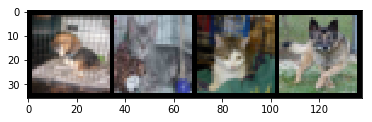

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
    npimg =img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(load_dataset())
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [53]:
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

  dog   cat   cat   dog


In [54]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        # This nn has 4 hidden layers and 1 output layer. Of the 4 hidden layers, there are two convolutional
        # and two linear (Feed Forward?)
        
        super(Net, self).__init__()
        # 3 input channels, 6 output channels, 5 kernel size
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        # 6 input channels, 16 output channels, 5 kernel size
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)
        self.fc2 = nn.Linear(10, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [55]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [56]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(load_dataset(), 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.693
[1,  4000] loss: 0.692
[1,  6000] loss: 0.690
[2,  2000] loss: 0.689
[2,  4000] loss: 0.675
[2,  6000] loss: 0.658
Finished Training


In [58]:
# Load Test Dataset

def load_test_dataset():
    transform = transforms.Compose(
                   [transforms.Resize((32,32)),
                    transforms.ToTensor()])
#                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
    data_path = "/Users/balakumaranpanneerselvam/Documents/Bala/projects/torch/data/dogs_vs_cats/test"
    test_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        # You can read about tensors here: 
        # https://www.grc.nasa.gov/www/k-12/Numbers/Math/documents/Tensors_TM2002211716.pdf
#         transform=torchvision.transforms.ToTensor(),
        transform=transform
    )
    
    # Loading the previously defined dataset    
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=4,
        num_workers=0,
        shuffle=True
    )
    return test_loader

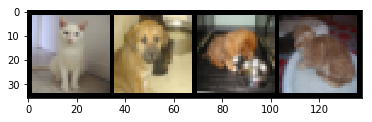

In [78]:
dataiter = iter(load_test_dataset())
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))

In [79]:
outputs = net(images)

In [80]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   dog   dog   cat
